In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mik_tools.tensor_utils import soft_maximum_log_barrier, soft_minimum_log_barrier, soft_unit_step, log_barrier



min value: tensor([3.9269])
max value: tensor([3.9269])
min value: tensor([10.8186])
max value: tensor([10.8186])
min value: tensor([inf])
max value: tensor([inf])


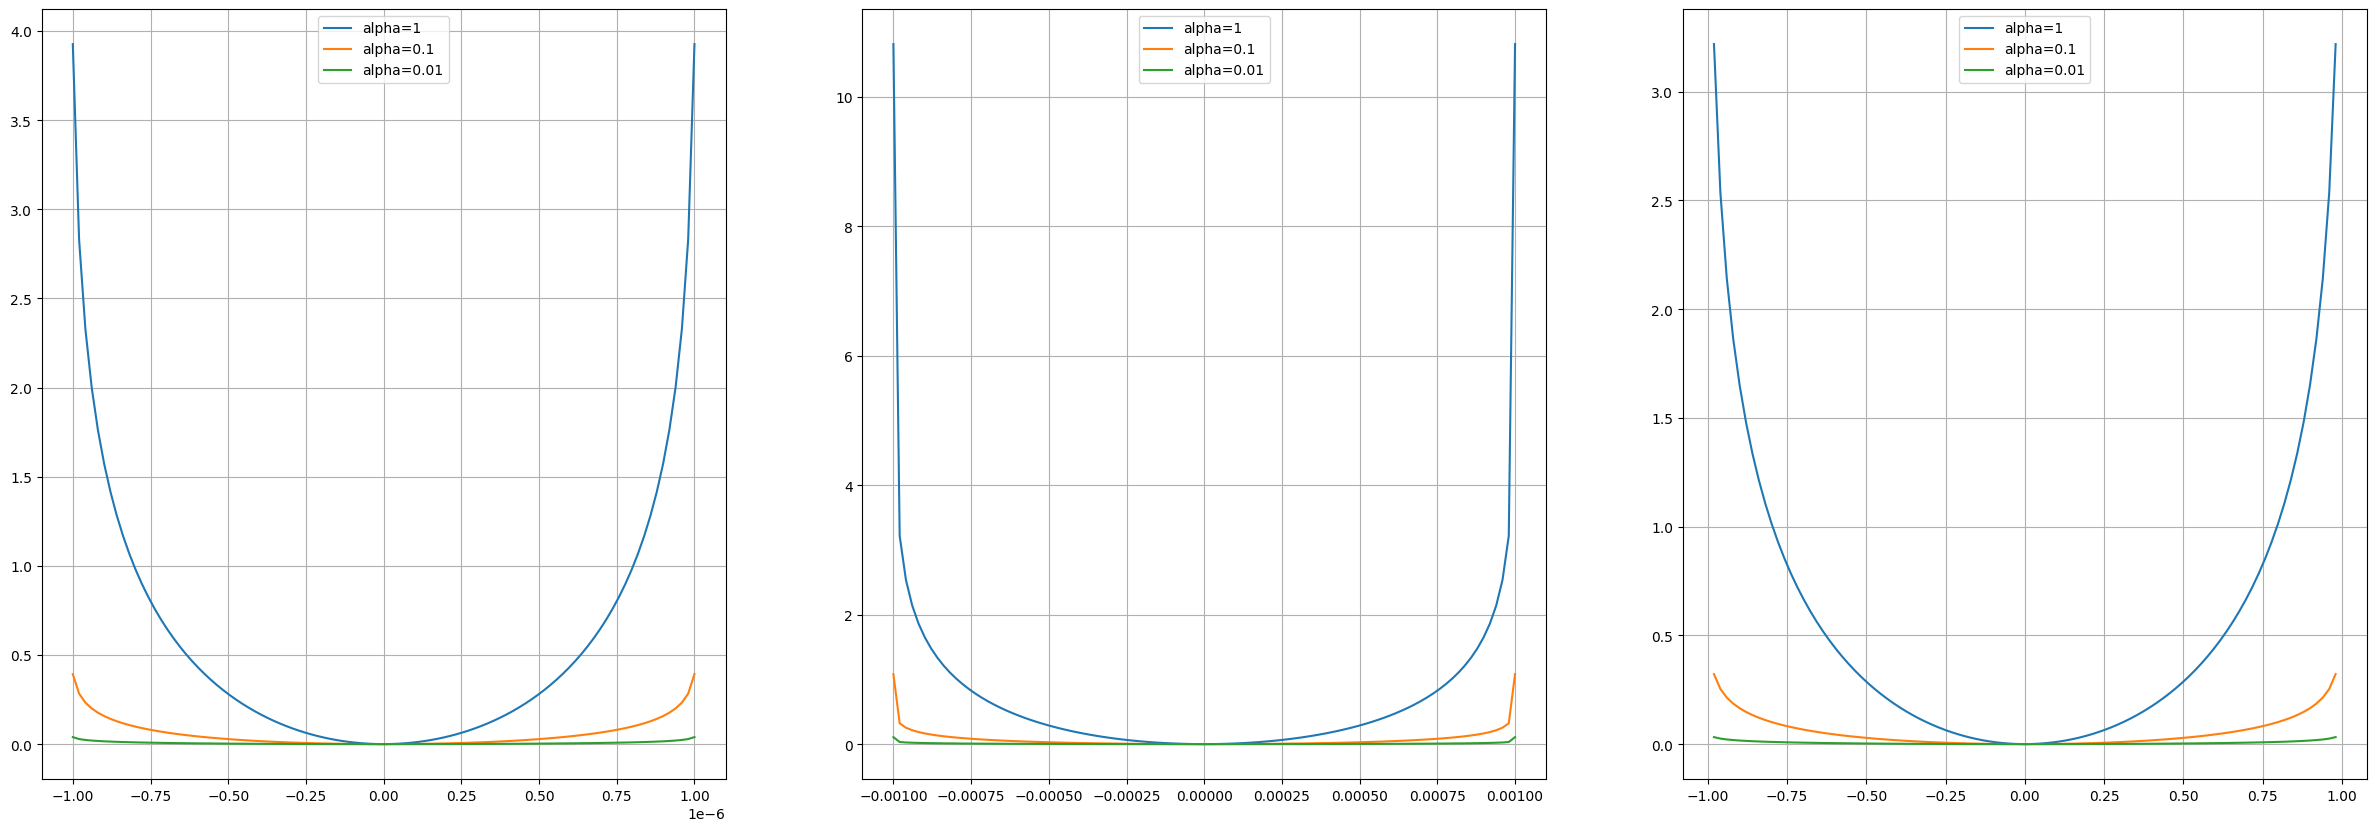

In [3]:
scales = [0.1, 1, 10, 100, 0.001]
scales = [0.000001, 0.001, 1]

num_scales = len(scales)
fig, axes = plt.subplots(1, num_scales, figsize=(10*num_scales, 10))

for i, scale in enumerate(scales):
    ax = axes[i]
    u_min = -1 * torch.ones(1) * scale
    u_max = 1 * torch.ones(1) * scale
    u = torch.linspace(-1*scale, 1*scale, 100)
    alphas = [1, 0.1, 0.01]
    for alpha in alphas:
        ax.plot(u, log_barrier(u, u_min, u_max, alpha=alpha), label=f'alpha={alpha}')
        
    print('min value:', log_barrier(u_min, u_min, u_max, alpha=1))
    print('max value:', log_barrier(u_max, u_min, u_max, alpha=1))
    ax.legend()
    ax.grid()


# u_min = -1 * torch.ones(1) * scale
# u_max = 1 * torch.ones(1) * scale
# u = torch.linspace(-1*scale, 1*scale, 100)
# 
# 
# 
# alphas = [0.01, 0.01, 1, 10, 100]


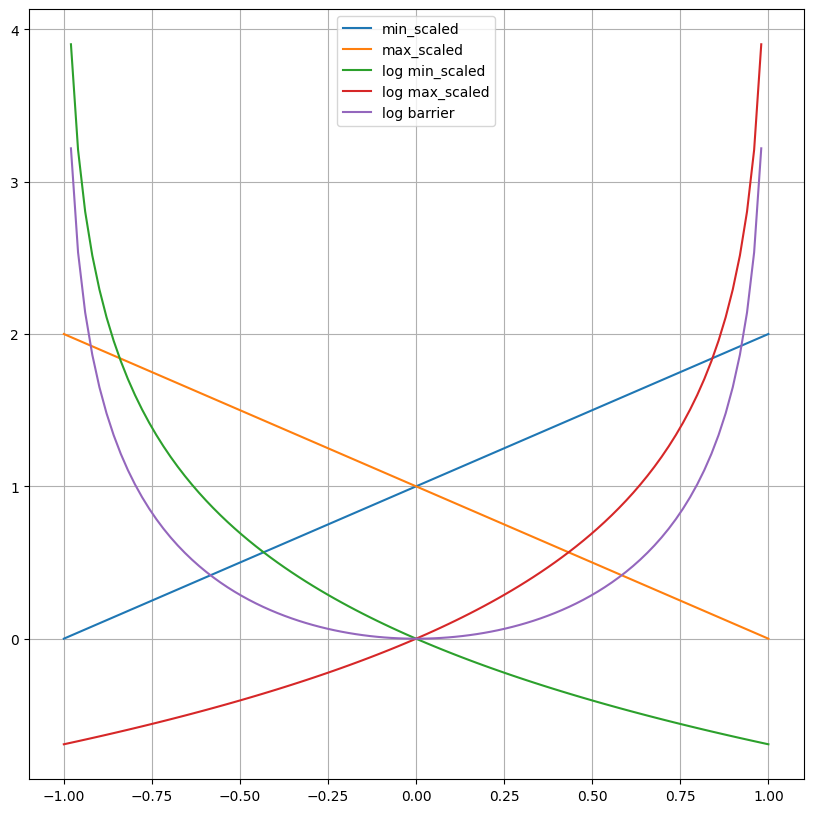

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
scale = 1
u_min = -1 * torch.ones(1) * scale
u_max = 1 * torch.ones(1) * scale
u = torch.linspace(-1*scale, 1*scale, 100)
alphas = [1]
for alpha in alphas:
    min_scaled = 2 *(u - u_min)/(u_max - u_min)
    max_scaled = 2 * (u_max - u)/(u_max - u_min)
    log_min = -torch.log(min_scaled)
    log_max = -torch.log(max_scaled)
    ax.plot(u, min_scaled, label=f'min_scaled')
    ax.plot(u, max_scaled, label=f'max_scaled')
    ax.plot(u, log_min, label=f'log min_scaled')
    ax.plot(u, log_max, label=f'log max_scaled')
    ax.plot(u, log_min + log_max, label=f'log barrier')
    
print()
ax.legend()
ax.grid()

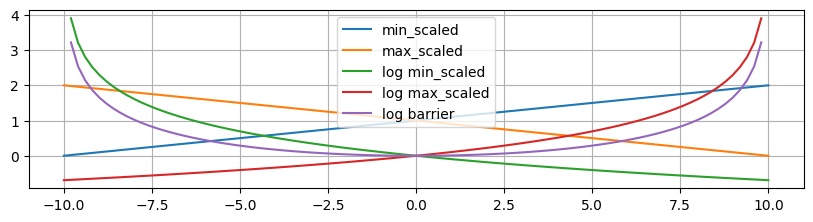

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
scale = 1.
u_min =  -10* torch.ones(1) * scale
u_max = 10 * torch.ones(1) * scale
u = torch.linspace(u_min[0], u_max[0], 100)
alphas = [1]
for alpha in alphas:
    min_scaled = 2 *(u - u_min)/(u_max - u_min)
    max_scaled = 2 * (u_max - u)/(u_max - u_min)
    log_min = -torch.log(min_scaled)
    log_max = -torch.log(max_scaled)
    ax.plot(u, min_scaled, label=f'min_scaled')
    ax.plot(u, max_scaled, label=f'max_scaled')
    ax.plot(u, log_min, label=f'log min_scaled')
    ax.plot(u, log_max, label=f'log max_scaled')
    ax.plot(u, log_min + log_max, label=f'log barrier')
    
print()
ax.legend()
ax.grid()
# set aspect equal with same range
ax.set_aspect('equal','box')